# Applying vision language models and image generation in a loop
In this notebook we apply a vision language model and an image generation model in a loop. The description generated by the vision model is passed to the image generation model as prompt. The resulting images are stored to disk.

In [1]:
import openai
from skimage.io import imread, imsave
import stackview
from image_utilities import numpy_to_bytestream
import base64
from stackview._image_widget import _img_to_rgb

We define two helper functions for vision and image generation.

In [2]:
def prompt_dall_e(prompt:str, width:int=1024, height:int=1024, model='dall-e-3'):
    """
    Generate an image from a given prompt.
    """
    client = openai.OpenAI()

    response = client.images.generate(
      prompt=prompt,
      model=model,
      n=1,
      size=f"{width}x{height}"
    )

    image_url = response.data[0].url

    image = imread(image_url)[::2, ::2]

    return image

In [3]:
def prompt_chatGPT(prompt:str, image, model="gpt-4o"):
    """Sends a prompt and an image to openAI
    and returns the text response.
    """
    rgb_image = _img_to_rgb(image)
    byte_stream = numpy_to_bytestream(rgb_image)
    base64_image = base64.b64encode(byte_stream).decode('utf-8')

    message = [{"role": "user", "content": [{
        "type": "image_url",
        "image_url": {
            "url": f"data:image/jpeg;base64,{base64_image}"
        }
    }]}]
            
    # setup connection to the LLM
    client = openai.OpenAI()
    
    # submit prompt
    response = client.chat.completions.create(
        model=model,
        messages=message
    )
    
    # extract answer
    return response.choices[0].message.content

In [4]:
image_filename = "data/real_cat_00.png"

image = imread(image_filename)

## The loop

Next we run both function in a loop. The image description that is used for prompting the next image is printed between the images.

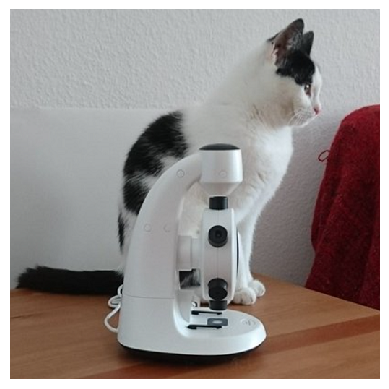

This image shows a cat sitting on a table next to a white microscope. The cat has a mix of white and black fur and is looking to the side. The microscope is modern and compact in design and is also white in color. The overall scene suggests a combination of curiosity and playfulness, as cats are known to explore and investigate new objects in their environment.


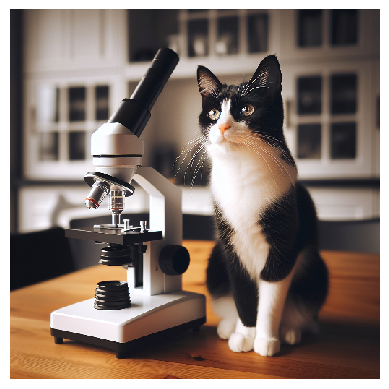

This image shows a black and white cat sitting on a wooden table next to a microscope. The setting appears to be a kitchen or a well-lit room with cabinets in the background. The cat is looking attentively towards something, creating a curious and inquisitive atmosphere. The presence of the microscope adds a playful and slightly educational touch to the image.


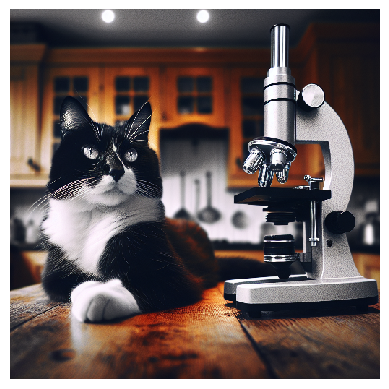

This image features a black and white cat sitting on a wooden surface next to a microscope in what appears to be a warmly lit kitchen. The cat is positioned comfortably next to the microscope, giving the impression of curiosity or investigation. The contrast between the cat and the scientific instrument creates a charming and whimsical scene.


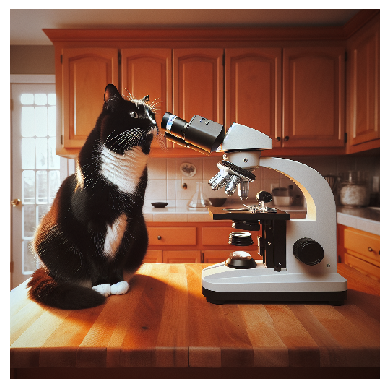

This is an image of a black and white cat sitting on a kitchen countertop, looking into a microscope. The cat appears curious, almost as if it is conducting a scientific experiment. The kitchen has wooden cabinets and a wooden countertop, with natural light coming through a door in the background. The scene is both humorous and endearing, showcasing a playful moment with the cat.


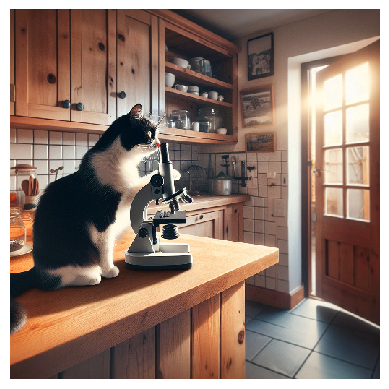

The image features a black and white cat sitting on a wooden countertop in a kitchen. The cat appears to be looking through a microscope placed on the counter. The kitchen has wooden cabinets with glass doors, white tiled backsplash, and various kitchen items visible in the background. Sunlight is streaming through a door with a glass window, casting a warm glow into the room. The scene has a cozy and homely atmosphere.


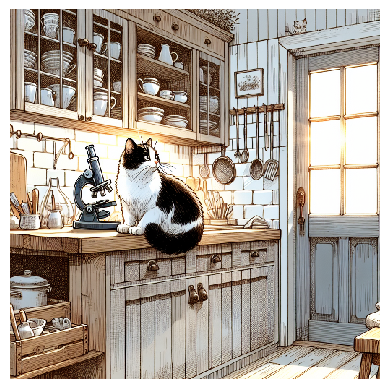

This image depicts a cozy kitchen scene with a black and white cat sitting on a wooden countertop next to a microscope. The kitchen has a rustic feel with wooden cabinets filled with various dishes and utensils, and there is natural light coming in from a windowed door on the right side of the image. The sunlight creates a warm atmosphere, highlighting the quaint, homey details of the kitchen.


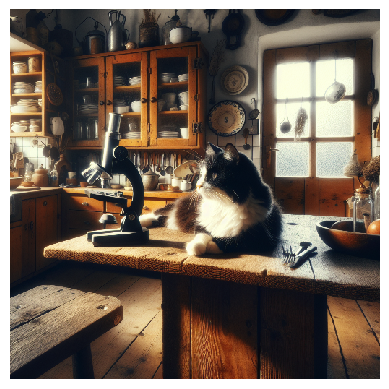

This image depicts a cozy, rustic kitchen with a wooden table at the forefront. On the table, there is a black and white cat sitting next to a microscope. The background shows an assortment of kitchen utensils, cabinets, and dishes, giving the space a warm and well-used feel. The lighting is soft, casting a warm glow throughout the room, enhancing the inviting atmosphere.


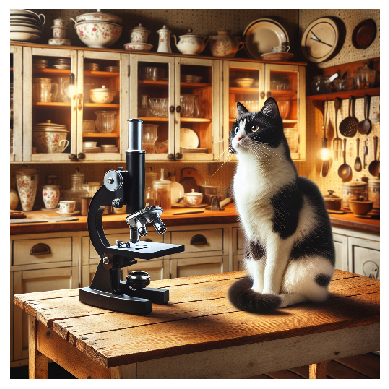

The image features a black and white cat sitting on a wooden table in a cozy kitchen. The kitchen has a vintage feel with wooden cabinets, shelves displaying various pottery and dishes, and hanging utensils. On the table next to the cat is a microscope, giving the scene a whimsical and curious atmosphere. It looks like the cat is intently observing something, adding a playful touch to the image.


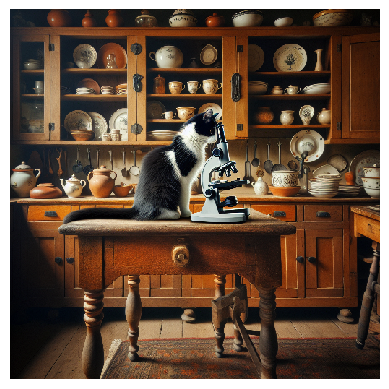

This is a whimsical image of a cat standing on a wooden table, peering into a microscope, as if it is conducting a scientific experiment. The setting appears to be a rustic kitchen or dining area, with wooden cabinets filled with various dishes and pottery. The combination of the cat with scientific equipment in a traditional kitchen creates a humorous and imaginative scene.


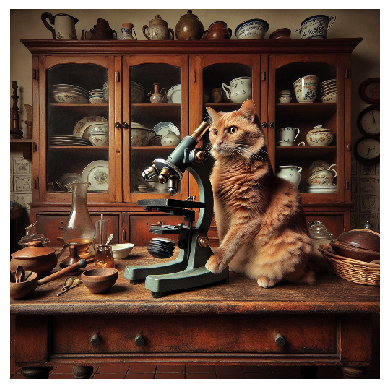

The image depicts a scene in a rustic room filled with wooden cabinets that contain various pottery and glassware. On a wooden table in the foreground, there's an orange cat sitting beside a vintage microscope and surrounded by various lab equipment like beakers, flasks, and mortars. The setting appears to blend elements of a traditional kitchen with a scientific laboratory, creating an interesting and charming composition. The cat seems curious and attentive, adding a whimsical touch to the setting.


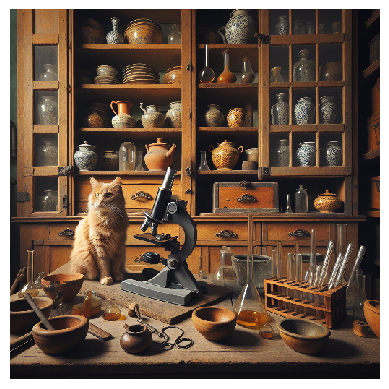

This image depicts a cozy scene inside a vintage laboratory or study, filled with various scientific instruments and glassware. There is a wooden table cluttered with laboratory apparatus, including a microscope, test tubes, beakers, flasks, and a mortar and pestle. A ginger cat is sitting on the table, adding a homely touch to the setting. The background features wooden shelves filled with ceramic jars and glass containers, suggesting a mix of scientific exploration and historical elements. The overall atmosphere is warm and nostalgic, evoking the feel of a traditional alchemist's or scientist's workshop.


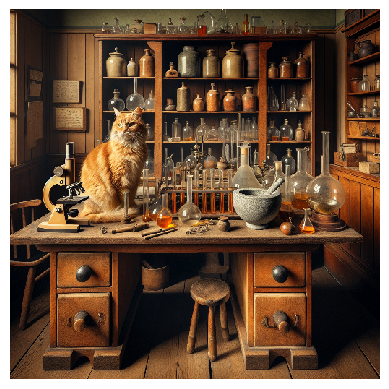

This image depicts a cozy, vintage-looking laboratory. A range of scientific apparatus such as beakers, test tubes, and a mortar and pestle are spread across a wooden table. Multiple glass jars and bottles filled with liquids and powders line the shelves in the background. At the forefront, a cat sits dignified on the bench next to a microscope, seemingly overseeing the scientific proceedings. The warm lighting enhances the nostalgic atmosphere of the scene.


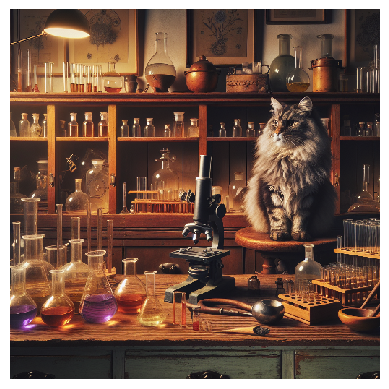

This is an image of a cozy, vintage-style laboratory. There are various beakers, flasks, and scientific glassware filled with colorful liquids on a wooden table. At the center, there's a microscope. A fluffy grey cat is sitting atop a stool, looking attentively towards the camera. The background features shelves filled with more scientific equipment and glassware, as well as framed botanical illustrations on the wall. Warm lighting from a lamp above adds to the ambiance, highlighting the intricate details of the scene.


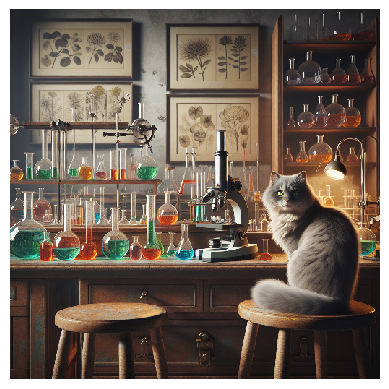

This is an image of a cozy, vintage-style laboratory with various scientific instruments and glassware, such as beakers, flasks, and a microscope. The shelves and counters are filled with colorful liquids and equipment. A fluffy gray cat is sitting on a stool in front of the workbench, giving the scene a charming and whimsical touch. The walls are decorated with botanical illustrations, adding to the vintage aesthetic of the laboratory.


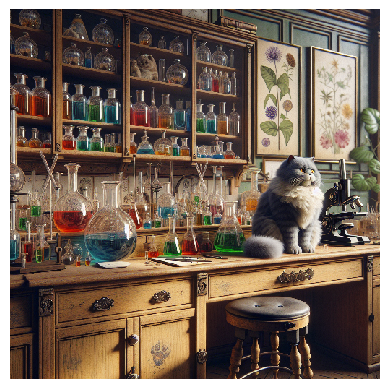

The image portrays a scene in a vintage laboratory setting. Here are some key elements observed in the image:

1. **Vintage Laboratory Equipment**: There are numerous glass flasks, beakers, and bottles filled with colorful liquids arranged on a wooden table and shelves.
2. **Cat**: A fluffy grey cat is sitting on the table among the lab equipment, seemingly observing the surroundings.
3. **Microscope**: There is an old-fashioned microscope on the table, suggesting scientific activity.
4. **Decor**: The room has a classical, antique feel with botanical illustrations framed and displayed on the wall.
5. **Wooden Furniture**: The furniture, including the shelves, table, and stool, are made of polished wood, enhancing the vintage atmosphere.

The combination of the cat and the elaborate vintage lab setup creates a whimsical and intriguing scene, blending elements of curiosity and scientific exploration with a touch of charm.


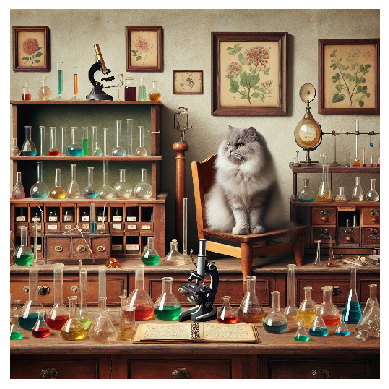

This is a charming image of a cat in what appears to be a vintage-style laboratory. The cat is sitting on a chair behind a desk that is cluttered with a variety of laboratory glassware, including beakers, flasks, and test tubes filled with colorful liquids. There is also a microscope on the desk. In the background, there are shelves with more laboratory equipment and glassware. The walls are decorated with framed illustrations of plants, enhancing the scientific and natural theme of the setting. The overall scene is quite whimsical, blending the precision of a laboratory with the playful presence of the cat.


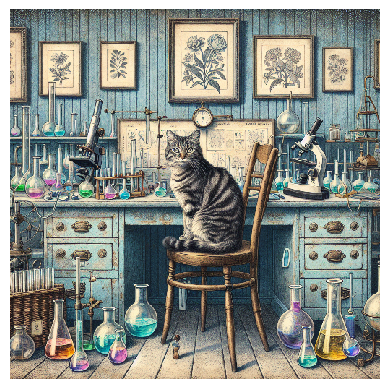

This is a whimsical illustration featuring a cat sitting on a wooden chair in what appears to be a laboratory or scientific workspace filled with various scientific equipment. The scene is detailed with beakers, flasks, microscopes, and other laboratory tools scattered around the desk and shelves. The walls have a blue tone and are adorned with botanical illustrations. The overall atmosphere blends a sense of scientific inquiry with a touch of charm and humor, given the presence of the cat in such an unusual setting.


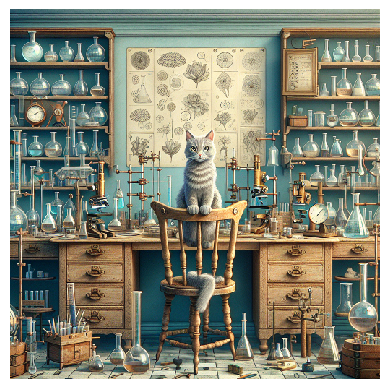

This whimsical image features a grey cat sitting on a wooden chair in what appears to be a scientific laboratory. The laboratory is filled with various scientific equipment such as beakers, test tubes, flasks, and other glassware, all meticulously arranged on the tables and shelves. The walls are adorned with scientific diagrams and botanical illustrations. The cat sits calmly, gazing forward, adding a charming and humorous element to this otherwise serious and detailed scientific setting.


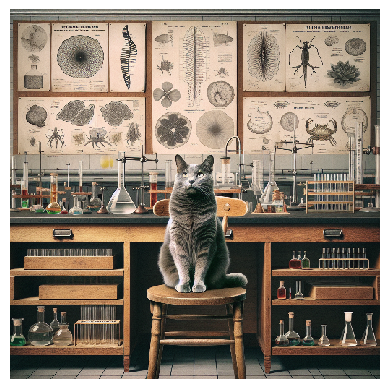

The image depicts a cat sitting on a stool in what appears to be a laboratory or study full of scientific equipment. The cat is surrounded by various laboratory instruments including beakers, test tubes, and flasks. The backdrop includes scientific diagrams and charts, possibly illustrating different biological specimens and anatomy. The setting gives off a vintage or classical scientific ambience.


In [5]:
for i in range(1, 20):
    stackview.imshow(image)
    
    description = prompt_chatGPT("Describe this image.", image)
    
    print(description)
    
    image = prompt_dall_e(description)
    
    imsave(image_filename.replace("_00.png", f"_{i:02}.png"), image)